##### Copyright 2020 Google LLC.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

<a href="https://colab.research.google.com/github/google-research/big_transfer/blob/master/colabs/big_transfer_jax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Install flax and run imports

In [2]:
#@markdown Select whether you would like to store data in your personal drive.
#@markdown
#@markdown If you select **yes**, you will need to authorize Colab to access
#@markdown your personal drive
#@markdown
#@markdown If you select **no**, then any changes you make will diappear when
#@markdown this Colab's VM restarts after some time of inactivity...
use_gdrive = 'yes'  #@param ["yes", "no"]

if use_gdrive == 'yes':
  from google.colab import drive
  drive.mount('/gdrive')
  root = '/gdrive/My Drive/Fall 20-21/COS 454/Project/cnn_txf_bias/'
  import os
  if not os.path.isdir(root):
    os.mkdir(root)
  os.chdir(root)
  print(f'\nChanged CWD to "{root}"')
else:
  from IPython import display
  display.display(display.HTML(
      '<h1 style="color:red">CHANGES NOT PERSISTED</h1>'))

Mounted at /gdrive

Changed CWD to "/gdrive/My Drive/Fall 20-21/COS 454/Project/cnn_txf_bias/"


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

import tensorflow as tf
import tensorflow_datasets as tfds

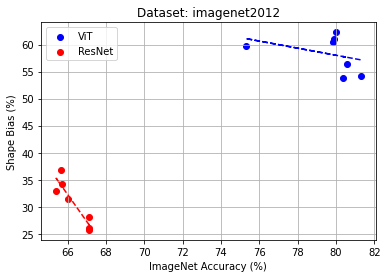

In [4]:
dataset = 'imagenet2012'
resnet_csv = pd.read_csv(f'./big_transfer/results/fine-tune/{dataset}/bit_fine-tune.csv')
vit_csv = pd.read_csv(f'./vision_transformer/results/fine-tune/{dataset}/vit_fine-tune.csv')
vit_bias = vit_csv['Shape Bias']
resnet_bias = resnet_csv['Shape Bias']

if dataset == 'cifar10':
  acc_label = 'CIFAR-10 Accuracy'
else:
  acc_label = 'ImageNet Accuracy'

vit_acc = vit_csv[acc_label]
resnet_acc = resnet_csv[acc_label]
  
vit_bias = [eval(b[:-1]) for b in vit_bias]
resnet_bias = [eval(b[:-1]) for b in resnet_bias]
vit_acc = [eval(a[:-1]) for a in vit_acc]
resnet_acc = [eval(a[:-1]) for a in resnet_acc]

plt.scatter(vit_acc, vit_bias, color='b', label='ViT')
plt.scatter(resnet_acc, resnet_bias, color='r', label='ResNet')
vit_line = np.poly1d(np.polyfit(vit_acc, vit_bias, 1))
plt.plot(vit_acc,vit_line(vit_acc),"b--")
resnet_line = np.poly1d(np.polyfit(resnet_acc, resnet_bias, 1))
plt.plot(resnet_acc,resnet_line(resnet_acc),"r--")
plt.grid()
plt.xlabel(f'{acc_label} (%)')
plt.ylabel('Shape Bias (%)')
plt.title(f'Dataset: {dataset}')
plt.legend()
plt.show()